# Get IC# from neut data

In [1]:
import os
import pickle

import altair as alt

import pandas as pd

import yaml

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE
from matplotlib import pyplot as plt

import matplotlib.transforms
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# change working directory to top of repo
os.chdir('../')

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

In [50]:
def get_ic_dilution(serum, ic_number):
    ser_run2 = (
        pd.read_excel('experiments/neut_assays/neut_data/2022-01-19_HK19_redone_H6R235M_AG_AUSAB_tidy.xlsx')
        .query(f'serum == "{serum}"')
    )

#     ser_run2['virus'] = ser_run2.apply(lambda x: 'HK19_WT_run2' if x['virus'] == 'HK19_WT' else x['virus'], axis=1)

    ser_run1 = (
        pd.read_excel('experiments/neut_assays/neut_data/2022-01-14-HK19_AlexGreninger_AUSAB01-16_tidy.xlsx')
        .query(f'serum == "{serum}"')
        .query('concentration != 0.000390625') # drop this, measured in second run already
    )
    
#     ser_run1 = ser_run1[ser_run1.concentration.isin([0.050000, 0.025000])] # only take highest two conc from run 1

#     ser_run1['virus'] = ser_run1.apply(lambda x: 'HK19_WT_run1' if x['virus'] == 'HK19_WT' else x['virus'], axis=1)


    ser_full = ser_run1.append(ser_run2)
    
    fits = neutcurve.CurveFits(ser_full)
    ic = fits.fitParams(ics=[ic_number]).query('virus == "HK19_WT"').iloc[0][f'ic{ic_number}']

    return ic

In [34]:
serum = '05-AUSAB'
ser_run1 = (
    pd.read_excel('experiments/neut_assays/neut_data/2022-01-14-HK19_AlexGreninger_AUSAB01-16_tidy.xlsx')
    .query(f'serum == "{serum}"')
#         .query('concentration != 0.000390625') # drop this, measured in second run already
)

ser_run1

,serum,virus,replicate,concentration,fraction infectivity
64,05-AUSAB,HK19_WT,1,0.050000,0.064531
65,05-AUSAB,HK19_WT,1,0.025000,0.029729
66,05-AUSAB,HK19_WT,1,0.012500,0.026780
67,05-AUSAB,HK19_WT,1,0.006250,0.055546
68,05-AUSAB,HK19_WT,1,0.003125,0.246128
69,05-AUSAB,HK19_WT,1,0.001563,0.425477
70,05-AUSAB,HK19_WT,1,0.000781,0.700672
71,05-AUSAB,HK19_WT,1,0.000391,0.681768
72,05-AUSAB,HK19_WT,2,0.050000,0.044946
73,05-AUSAB,HK19_WT,2,0.025000,0.039797


In [51]:
get_ic_dilution('13-AUSAB', 99)

0.0014721610014951398

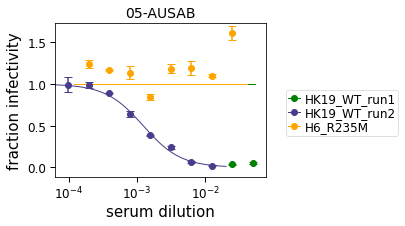

In [47]:
fig, axes = fits07.plotSera(
    xlabel='serum dilution',
    virus_to_color_marker={
        'HK19_WT_run1': ('green', 'o'),
        'HK19_WT_run2': ('DarkSlateBlue', 'o'),
        'H6_R235M': ('orange', 'o')}
)